# Phase 2: Exploratory Data Analysis

## Research Questions:

a) Which index has given consistently good returns?  
b) Which index was highly volatile?  
c) How are global markets correlated during 6 years period and is the correlation structure similar in the recent year-2023?  
d) Assuming primary target variable as "Nifty Opening Price Direction", what are preliminary insights?

## 1. Global Indices 5 Years Performance Analytics

For each index (a to f above):

a) **Box-Whisker Plot** of daily returns by "YEAR"  
b) **Table** of daily returns by "YEAR" - (n, mean and std. deviation)  
c) **Bar Plot** of median daily return by "YEAR"  
d) **Heat Map** by "YEAR" and "QUARTER" showing median/mean returns  

## 2. Global Indices - Correlation Analysis

a) **Correlation Matrix** of 6 years daily returns (6 by 6 matrix)  
b) **Correlation Matrix** of one year (2024) daily returns (6 by 6 matrix)

## 3. Pre-Post Covid Performance Analytics

Time required for a market to come back to pre-covid level

## 4. Nifty 50 Daily Movement - Pre Modeling Work

a) **Define** `Nifty_Open_Dir = 1` if Nifty 50 Open at t > Close at t-1  
   `Nifty_Open_Dir = 0` otherwise  

b) **Table** of % of `Nifty_Open_Dir=1` by year  

c) **Visualize/summarize** global indices including VIX for 2 categories of `Nifty_Open_Dir`

**Example:** Box-whisker plot of lag (DJI Returns) for 2 categories of `Nifty_Open_Dir`

In [6]:
import pandas as pd

df = pd.read_csv('markets_with_returns.csv')

# List of market return columns to be used in methods below
market_return_columns = [
    'Nifty_Return', 'DowJones_Return', 'Nasdaq_Return',
    'HangSeng_Return', 'Nikkei_Return', 'DAX_Return']

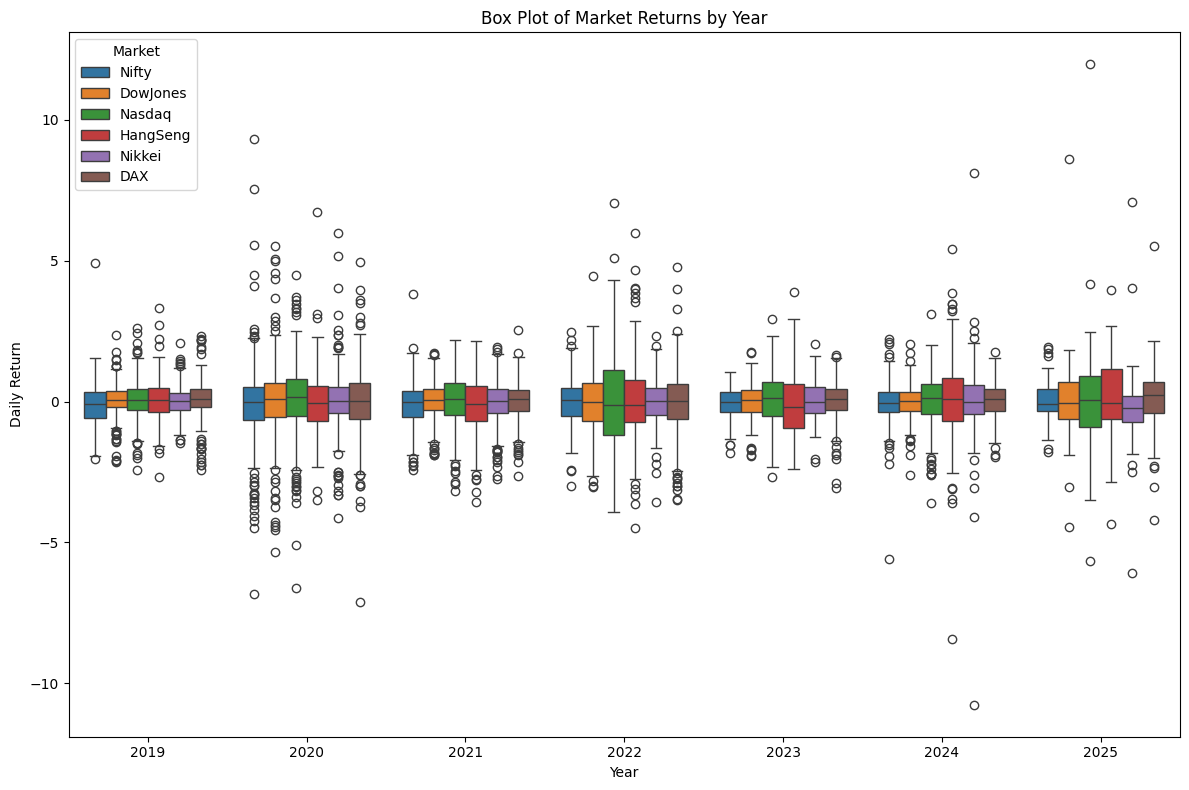

In [7]:
# Box plot of all markets per year, with market names only (no '_Return')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for boxplot: melt the dataframe
# id_vars=['Year']: Columns to keep as identifiers (not melted)
# value_vars=market_return_columns: Columns to melt into rows
# var_name='Market': Name for the new column containing the original column names
# value_name='Return': Name for the new column containing the values
melted_returns = df.melt(id_vars=['Year'], value_vars=market_return_columns,
                  var_name='Market', value_name='Return')
# Rename 'Market' values to remove '_Return' suffix
melted_returns['Market'] = melted_returns['Market'].apply(lambda x: x.split('_')[0])

plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Return', hue='Market', data=melted_returns)
plt.title('Box Plot of Market Returns by Year')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.legend(title='Market')
plt.tight_layout()
plt.show()

In [8]:
# Table of daily returns by YEAR (n, mean, std. deviation), grouped by year, market names cleaned
returns_stats = melted_returns.groupby(['Year', 'Market'])['Return'].agg(['count', 'mean', 'std']).reset_index()
returns_stats.columns = ['Year', 'Market', 'n', 'Mean', 'StdDev']

# Create a comprehensive statistics table with multi-level columns
stats_pivot = returns_stats.pivot(index='Market', columns='Year', values=['n', 'Mean', 'StdDev'])
stats_pivot = stats_pivot.reorder_levels([1, 0], axis=1).sort_index(axis=1)

print("Daily Returns Statistics - All Years Combined:")
display(stats_pivot.round(4))

Daily Returns Statistics - All Years Combined:


Year        2019                   2020                   2021                 \
            Mean  StdDev      n    Mean  StdDev      n    Mean  StdDev      n   
Market                                                                          
DAX       0.0603  0.7318  260.0 -0.0270  1.2925  261.0  0.0167  0.6869  260.0   
DowJones  0.0516  0.5984  260.0 -0.0085  1.4440  261.0  0.0479  0.6899  260.0   
HangSeng  0.0502  0.7306  260.0 -0.0886  1.0394  261.0 -0.1286  0.9981  260.0   
Nasdaq    0.0687  0.7199  260.0  0.0700  1.3854  261.0  0.0091  0.9071  260.0   
Nifty    -0.1041  0.7589  260.0 -0.1164  1.5499  261.0 -0.1007  0.8152  260.0   
Nikkei    0.0255  0.5150  260.0  0.0240  1.1366  261.0 -0.0427  0.7961  260.0   

Year        2022  ...           2023                   2024                 \
            Mean  ...      n    Mean  StdDev      n    Mean  StdDev      n   
Market            ...                                                        
DAX       0.0000  ...  260.0  0.0399  0.6512  260.0  0.0378  0.6490  261.0   
DowJones -0.0231  ...  260.0  0.0357  0.6327  260.0  0.0076  0.5947  261.0   
HangSeng  0.0309  ...  260.0 -0.1104  1.0645  260.0  0.1012  1.3425  261.0   
Nasdaq   -0.0623  ...  260.0  0.1045  0.9299  260.0  0.0069  0.8877  261.0   
Nifty    -0.0038  ...  260.0 -0.0479  0.5070  260.0 -0.0613  0.7489  261.0   
Nikkei   -0.0091  ...  260.0  0.0422  0.6623  260.0  0.0338  1.2300  261.0   

Year        2025                
            Mean  StdDev     n  
Market                          
DAX       0.0867  1.1905  85.0  
DowJones  0.0016  1.4055  85.0  
HangSeng  0.1157  1.2669  85.0  
Nasdaq    0.0574  1.9626  85.0  
Nifty     0.0222  0.7195  85.0  
Nikkei   -0.2169  1.3442  85.0  

[6 rows x 21 columns]

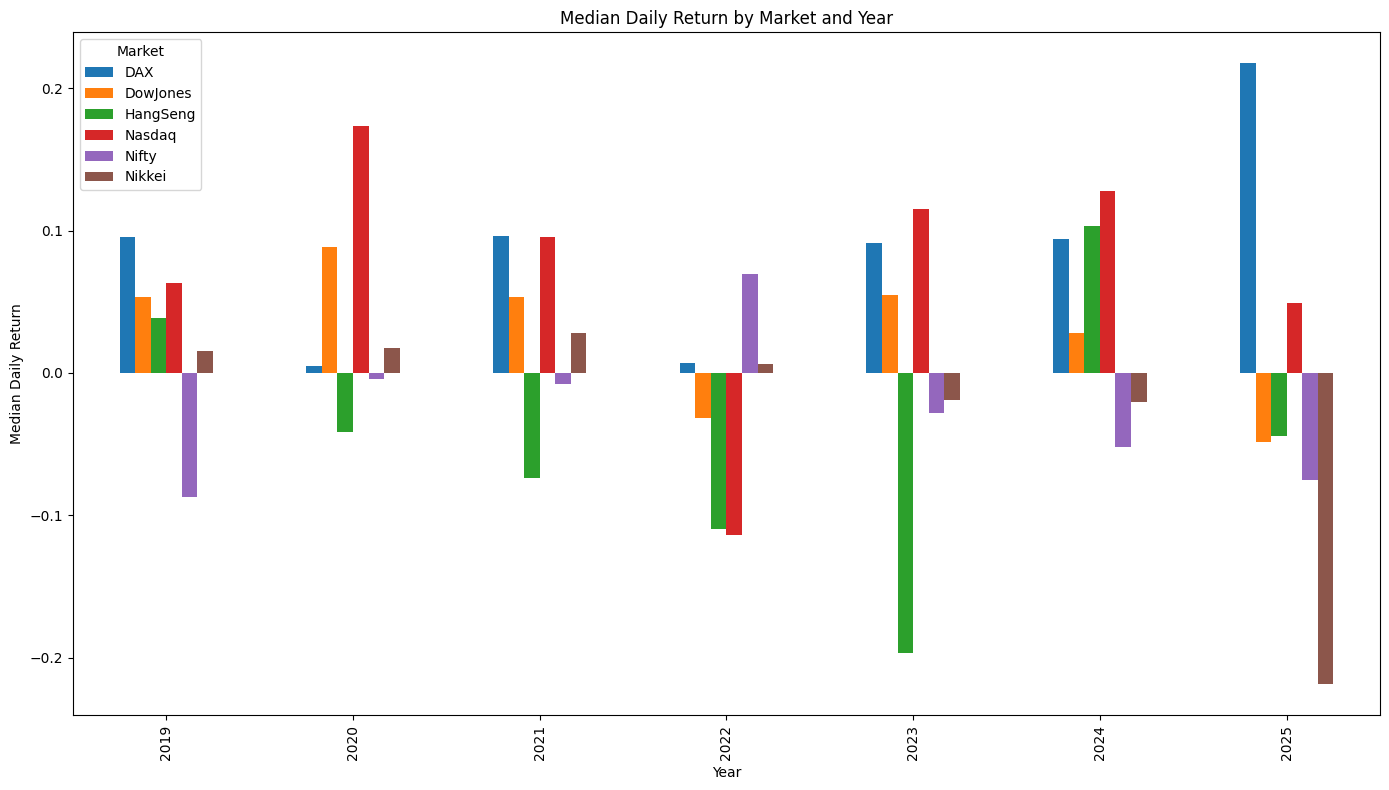

In [9]:
# Bar Plot of median daily return for all markets per year
median_returns = melted_returns.groupby(['Year', 'Market'])['Return'].median().reset_index()
pivot_median = median_returns.pivot(index='Year', columns='Market', values='Return')

pivot_median.plot(kind='bar', figsize=(14, 8))
plt.title('Median Daily Return by Market and Year')
plt.xlabel('Year')
plt.ylabel('Median Daily Return')
plt.legend(title='Market')
plt.tight_layout()
plt.show()

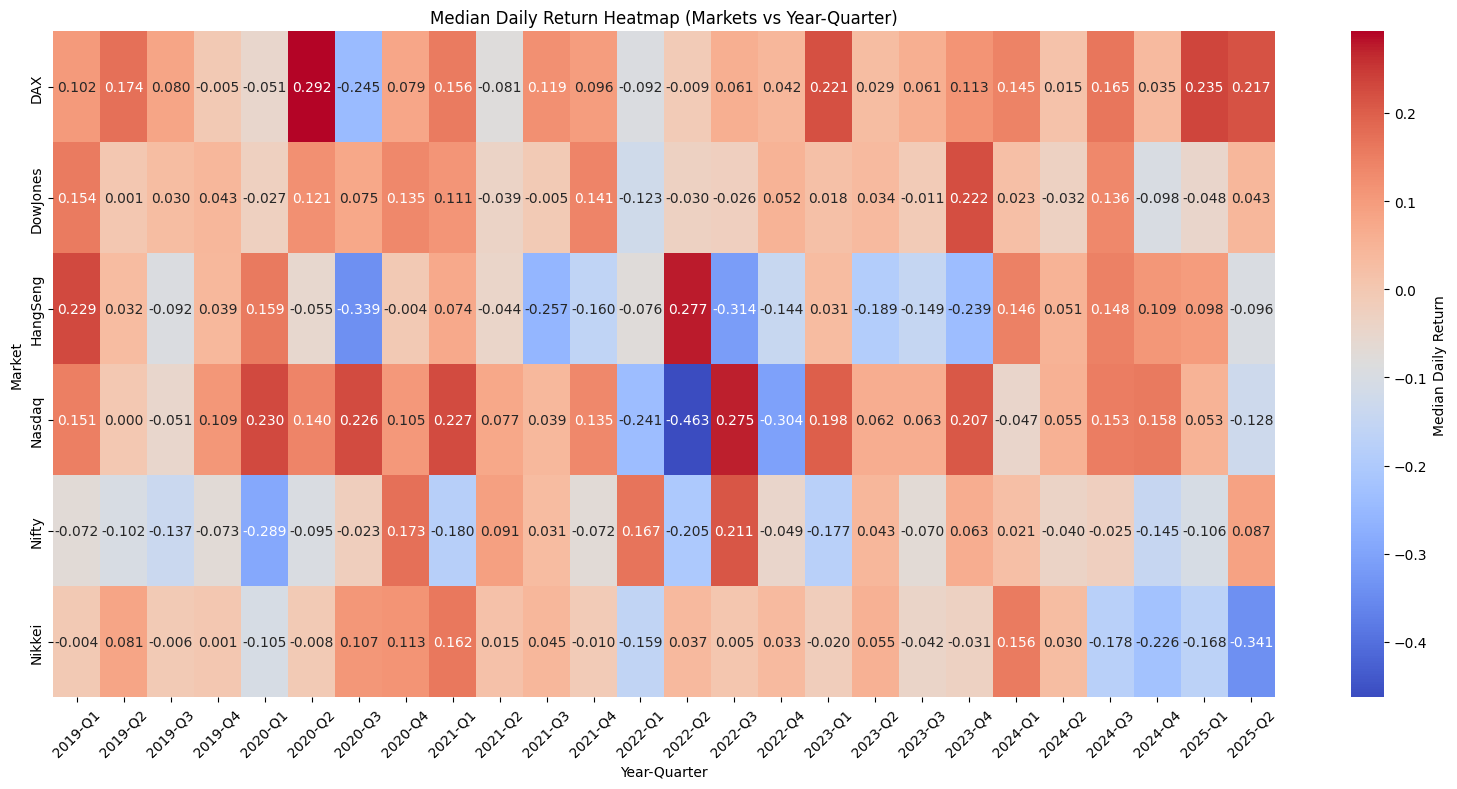

In [10]:
# Heatmap of median returns for all markets by YEAR and QUARTER (combined)
melted_quarter = df.melt(id_vars=['Year', 'Quarter'], value_vars=market_return_columns,
                        var_name='Market', value_name='Return')
melted_quarter['Market'] = melted_quarter['Market'].apply(lambda x: x.split('_')[0])

# Create Year-Quarter combination for better labeling
melted_quarter['Year_Quarter'] = melted_quarter['Year'].astype(str) + '-Q' + melted_quarter['Quarter'].astype(str)

# Calculate median returns by Market and Year-Quarter
median_year_quarter = melted_quarter.groupby(['Year_Quarter', 'Market'])['Return'].median().reset_index()
pivot_year_quarter = median_year_quarter.pivot(index='Market', columns='Year_Quarter', values='Return')

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_year_quarter, annot=True, fmt=".3f", cmap='coolwarm',
            cbar_kws={'label': 'Median Daily Return'})
plt.title('Median Daily Return Heatmap (Markets vs Year-Quarter)')
plt.xlabel('Year-Quarter')
plt.ylabel('Market')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

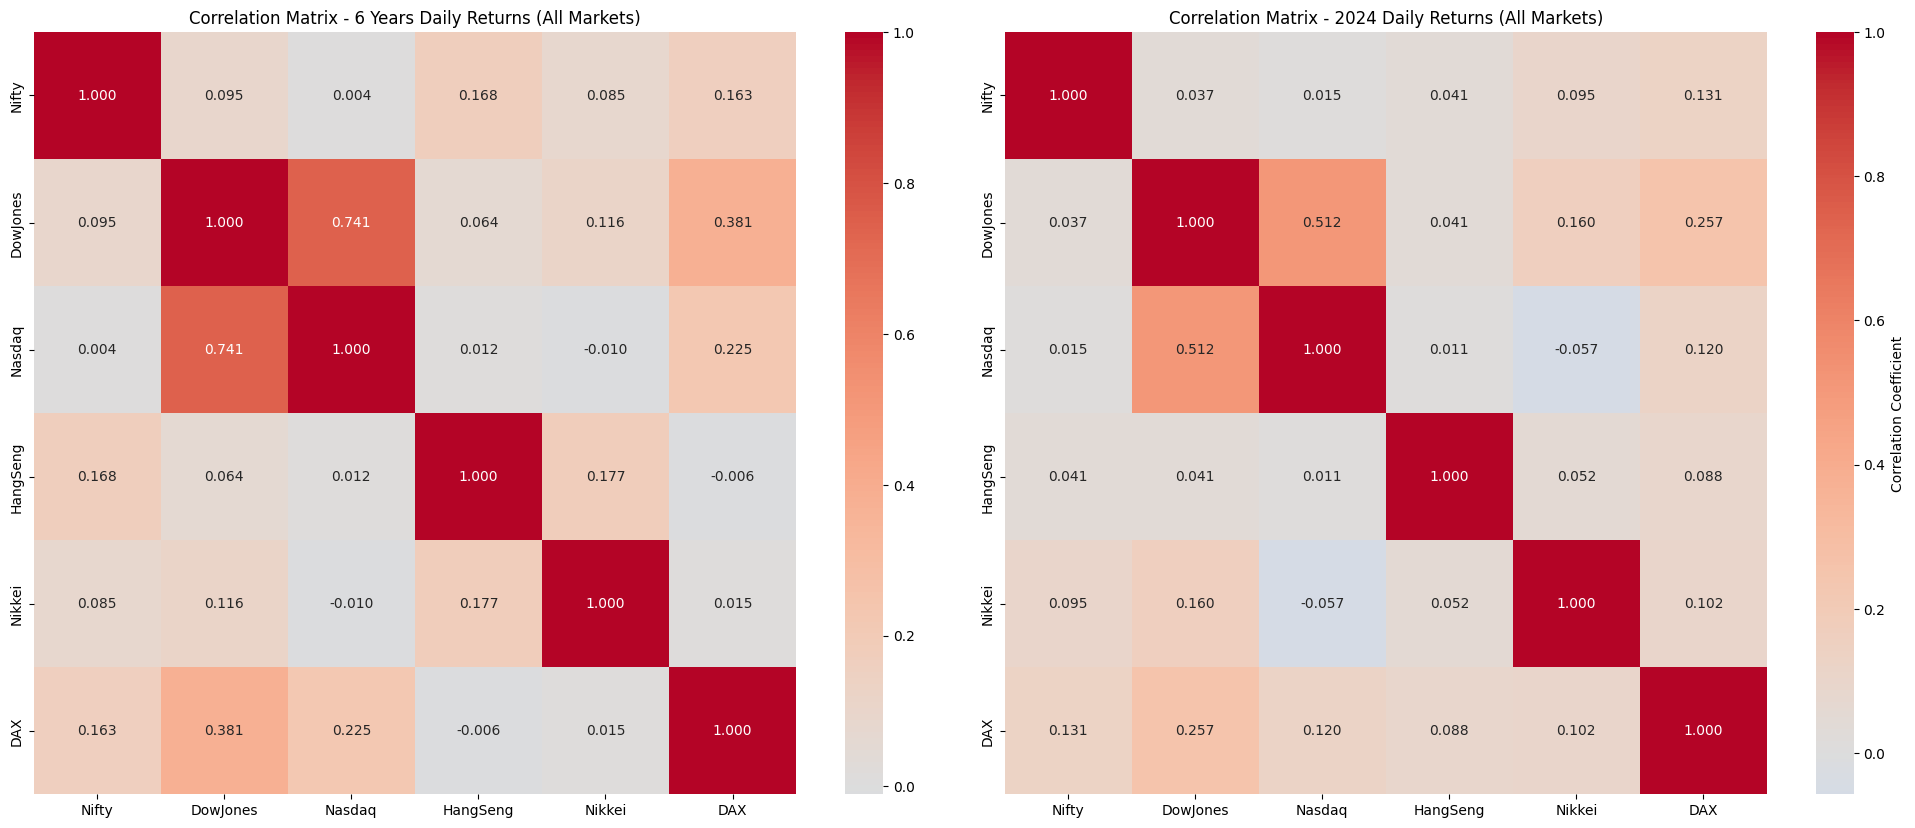

In [11]:
# Create correlation matrix for all 6 years of data
correlation_6years = df[market_return_columns].corr()

# Clean up column and index names (remove '_Return' suffix)
correlation_6years.columns = [col.split('_')[0] for col in correlation_6years.columns]
correlation_6years.index = [idx.split('_')[0] for idx in correlation_6years.index]

# Filter data for 2024 only
df_2024 = df[df['Year'] == 2024]

# Create correlation matrix for 2024 data
correlation_2024 = df_2024[market_return_columns].corr()

# Clean up column and index names (remove '_Return' suffix)
correlation_2024.columns = [col.split('_')[0] for col in correlation_2024.columns]
correlation_2024.index = [idx.split('_')[0] for idx in correlation_2024.index]


# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))


# Display correlation matrix for all 6 years of data
sns.heatmap(correlation_6years, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, ax=ax1)
ax1.set_title('Correlation Matrix - 6 Years Daily Returns (All Markets)')

#  Display correlation matrix for 2024 as heatmap
sns.heatmap(correlation_2024, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, ax=ax2, cbar_kws={'label': 'Correlation Coefficient'})
ax2.set_title('Correlation Matrix - 2024 Daily Returns (All Markets)')


plt.tight_layout()
plt.show()


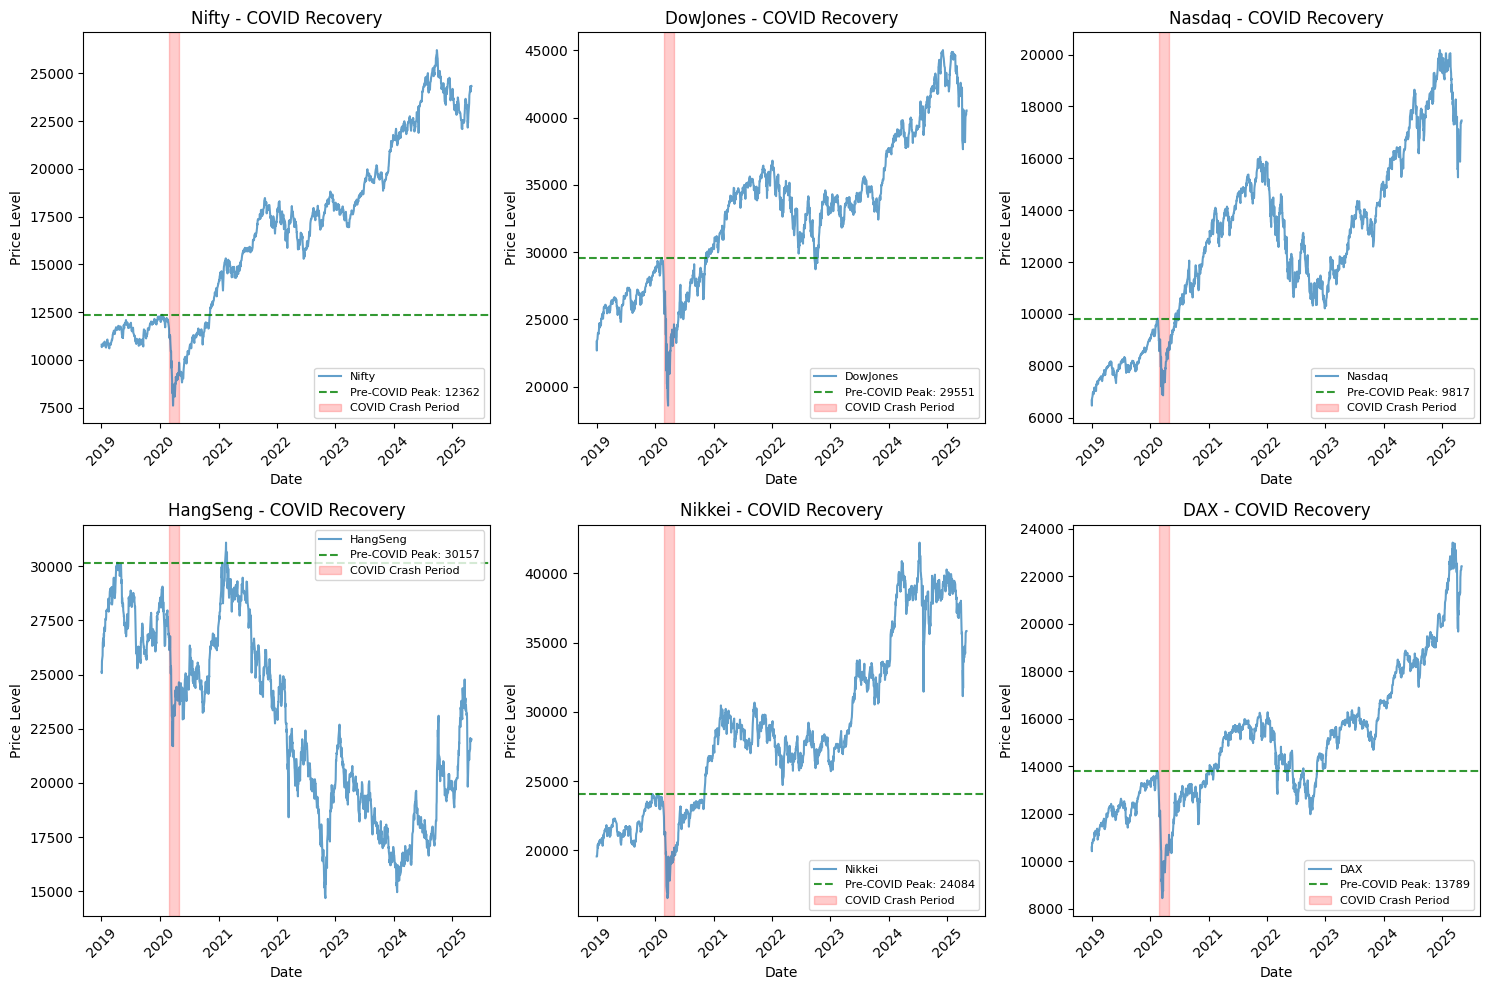

In [14]:
## 3. Pre-Post Covid Performance Analytics
# Time required for a market to come back to pre-covid level

# Define COVID impact period
covid_crash_start = '2020-02-24'  # When markets started falling
covid_crash_end = '2020-04-01'    # End of major crash phase

# Convert Date column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Define pre-COVID baseline (January 2020 peak levels)
pre_covid_period = df[df['Date'] < covid_crash_start]
pre_covid_peaks = {}

# Get market price columns (Close prices)
market_price_columns = ['Nifty_Close', 'DowJones_Close', 'Nasdaq_Close',
                       'HangSeng_Close', 'Nikkei_Close', 'DAX_Close']

for col in market_price_columns:
    if col in df.columns:
        pre_covid_peaks[col] = pre_covid_period[col].max()


# Calculate recovery metrics for each market
recovery_analysis = []

for col in market_price_columns:
    if col not in df.columns:
        continue

    market_name = col.replace('_Close', '')
    peak_level = pre_covid_peaks[col]

    # Find COVID low point
    covid_period = df[(df['Date'] >= covid_crash_start) & (df['Date'] <= '2020-04-30')]
    covid_low = covid_period[col].min()
    covid_low_date = covid_period[covid_period[col] == covid_low]['Date'].iloc[0]

    # Calculate drawdown
    max_drawdown = ((covid_low - peak_level) / peak_level) * 100

    # Find recovery date (first time back to pre-COVID peak)
    post_covid = df[df['Date'] > covid_low_date]
    recovery_data = post_covid[post_covid[col] >= peak_level]

    if not recovery_data.empty:
        recovery_date = recovery_data['Date'].iloc[0]
        recovery_days = (recovery_date - covid_low_date).days
        recovered = True
    else:
        recovery_date = None
        recovery_days = None
        recovered = False
        # Check current level vs pre-COVID peak
        current_level = df[col].iloc[-1]
        current_recovery_pct = ((current_level - peak_level) / peak_level) * 100

    recovery_analysis.append({
        'Market': market_name,
        'Pre_COVID_Peak': peak_level,
        'COVID_Low': covid_low,
        'COVID_Low_Date': covid_low_date.strftime('%Y-%m-%d'),
        'Max_Drawdown_%': round(max_drawdown, 2),
        'Recovered': recovered,
        'Recovery_Date': recovery_date.strftime('%Y-%m-%d') if recovery_date else 'Not yet',
        'Recovery_Days': recovery_days,
        'Current_Level': df[col].iloc[-1] if col in df.columns else None
    })


# Recovery timeline
plt.figure(figsize=(15, 10))

for i, col in enumerate(market_price_columns):
    if col not in df.columns:
        continue

    plt.subplot(2, 3, i+1)
    market_name = col.replace('_Close', '')

    # Plot the price series
    plt.plot(df['Date'], df[col], label=market_name, alpha=0.7)

    # Mark pre-COVID peak
    peak_level = pre_covid_peaks[col]
    plt.axhline(y=peak_level, color='green', linestyle='--', alpha=0.8,
                label=f'Pre-COVID Peak: {peak_level:.0f}')

    # Mark COVID period
    covid_start_idx = df[df['Date'] >= covid_crash_start].index[0] if not df[df['Date'] >= covid_crash_start].empty else 0
    covid_end_idx = df[df['Date'] >= '2020-04-30'].index[0] if not df[df['Date'] >= '2020-04-30'].empty else len(df)

    plt.axvspan(df['Date'].iloc[covid_start_idx], df['Date'].iloc[covid_end_idx],
                alpha=0.2, color='red', label='COVID Crash Period')


    plt.title(f'{market_name} - COVID Recovery')
    plt.xlabel('Date')
    plt.ylabel('Price Level')
    plt.legend(fontsize=8)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [17]:
# a) **Define** `Nifty_Open_Dir = 1` if Nifty 50 Open at t > Close at t-1
#    `Nifty_Open_Dir = 0` otherwise

# Sort dataframe by date to ensure proper order for lag calculation
df = df.sort_values('Date').reset_index(drop=True)

# Create Nifty_Open_Dir variable
df['Nifty_Open_Dir'] = (df['Nifty_Open'] > df['Nifty_Close'].shift(1)).astype(int)


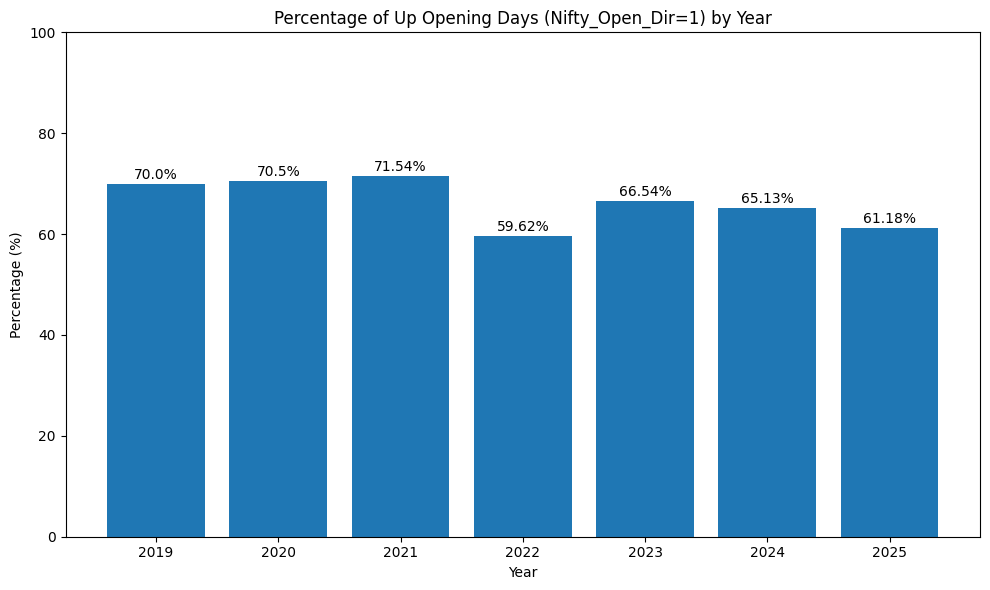

In [10]:
# b) **Table** of % of `Nifty_Open_Dir=1` by year

# Calculate percentage of up days (Nifty_Open_Dir=1) by year
nifty_dir_by_year = df.groupby('Year')['Nifty_Open_Dir'].agg(['count', 'sum', 'mean']).reset_index()
# Rename columns
nifty_dir_by_year.columns = ['Year', 'Total_Days', 'Up_Days', 'Percentage_Up']

# Convert percentage to percentage format
nifty_dir_by_year['Percentage_Up'] = (nifty_dir_by_year['Percentage_Up'] * 100).round(2)

# Display the table
plt.figure(figsize=(10, 6))
plt.bar(nifty_dir_by_year['Year'], nifty_dir_by_year['Percentage_Up'])
plt.title('Percentage of Up Opening Days (Nifty_Open_Dir=1) by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
for i, v in enumerate(nifty_dir_by_year['Percentage_Up']):
    plt.text(nifty_dir_by_year['Year'].iloc[i], v + 1, f'{v}%', ha='center')
plt.tight_layout()
plt.show()

/var/folders/y3/0yphlgnn3szgcjyr68zc1w680000gn/T/ipykernel_76173/3420391745.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nifty_Open_Dir', y=market, data=df, palette=["#BE6969", "#5EBCB6"])
/var/folders/y3/0yphlgnn3szgcjyr68zc1w680000gn/T/ipykernel_76173/3420391745.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nifty_Open_Dir', y=market, data=df, palette=["#BE6969", "#5EBCB6"])
/var/folders/y3/0yphlgnn3szgcjyr68zc1w680000gn/T/ipykernel_76173/3420391745.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nifty_Open_Dir'

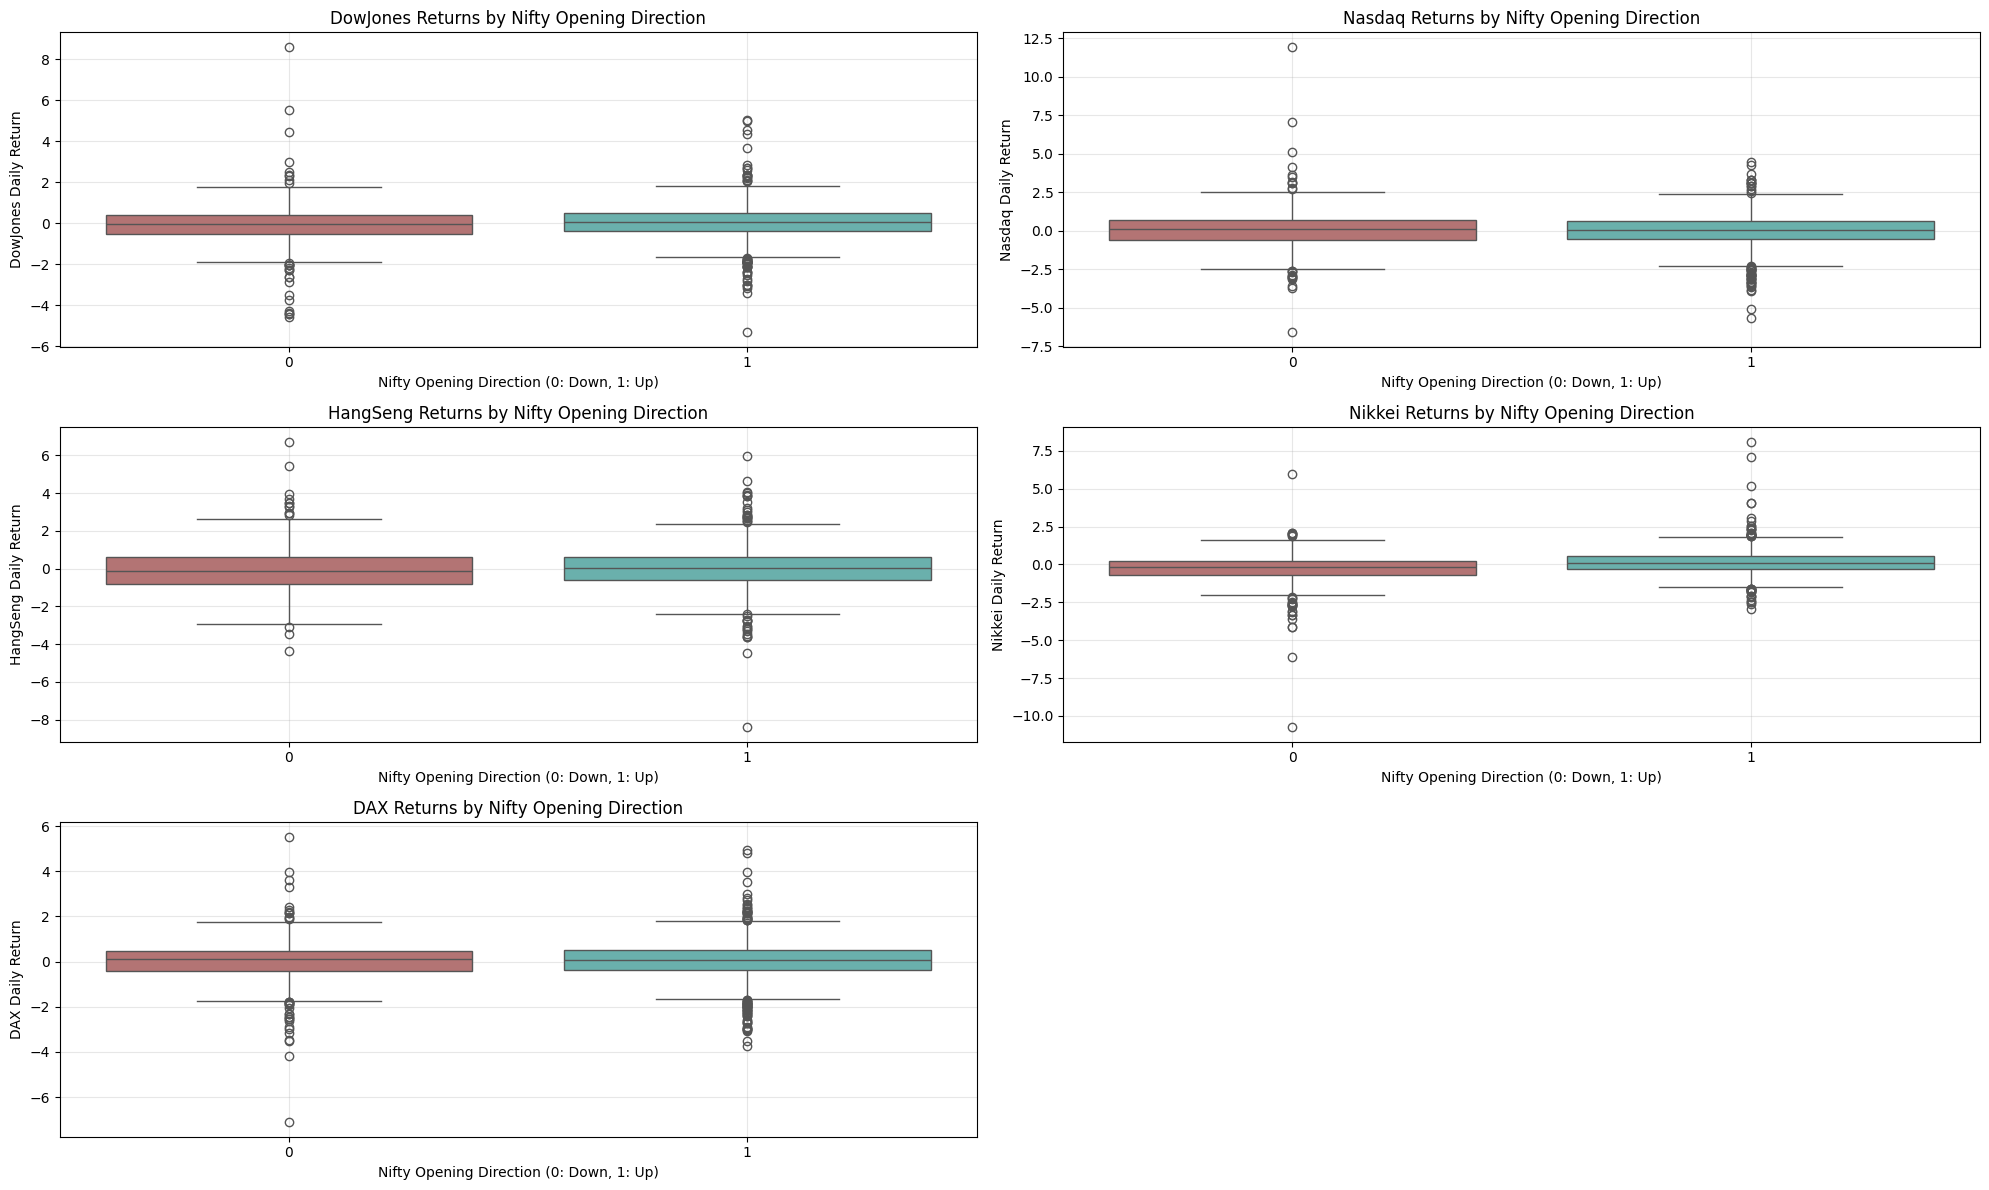

In [20]:
# c) **Visualize/summarize** global indices including VIX for 2 categories of `Nifty_Open_Dir`

# Create box plots for each market's returns grouped by Nifty_Open_Dir
plt.figure(figsize=(20, 12))

# Define the markets to analyze
markets_to_analyze = ['DowJones_Return', 'Nasdaq_Return', 'HangSeng_Return', 'Nikkei_Return', 'DAX_Return']

for i, market in enumerate(markets_to_analyze, 1):
    plt.subplot(3, 2, i)

    # Create box plot
    sns.boxplot(x='Nifty_Open_Dir', y=market, data=df, palette=["#BE6969", "#5EBCB6"])

    # Clean up market name for title
    market_name = market.replace('_Return', '')
    plt.title(f'{market_name} Returns by Nifty Opening Direction')
    plt.xlabel('Nifty Opening Direction (0: Down, 1: Up)')
    plt.ylabel(f'{market_name} Daily Return')

    # Add grid for better readability
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()